## Barabasi - Albert Model

## Erdos - Renyi Model
Para calcular la probabilidad ${\displaystyle P(k)}$ (distribución de grado) de que un nodo tenga k conexiones en la red aleatoria generada con el modelo Erdös–Rényi, primero se intenta calcular la probabilidad ${\displaystyle p_{c}}$  de que una pareja elegida al azar esté enlazada entre sí. Para ello se calcula el número total de posibles parejas en una red de N nodos, a ese número total lo denominamos ${\displaystyle N_{p}}$ y su expresión es:


   $ {\displaystyle N_{p}={\dbinom {N}{2}}={\frac {N(N-1)}{2}}}$


como el número de parejas enlazadas por el modelo es M, se tiene por lo tanto la expresión analítica de la probabilidad ${\displaystyle p_{c}}$ como:

   ${\displaystyle p_{c}={\frac {M}{N_{p}}}={\frac {2M}{N(N-1)}}}$

si tomamos en la red generada un nodo particular al azar y lo denominamos v j ${\displaystyle v_{j}} v_{j}$, el número de nodos enlazados a pares que contuvieran a v j ${\displaystyle v_{j}} v_{j}$ sería N-1, ya que v j ${\displaystyle v_{j}} v_{j}$ se puede enlazar con exactamente N-1 nodos restantes de la red. Sin embargo en los M enlaces generados, puede que no estuviera v j ${\displaystyle v_{j}} v_{j}$. Suponemos entonces que estuviera en k de ellas. La probabilidad en este caso de que estuviera v j ${\displaystyle v_{j}} v_{j}$ contenido en k parejas de las N-1 posibles es:

${\displaystyle P(k)={N-1 \choose k}(p_{c})^{k}(1-p_{c})^{N-1-k}}$

Esta fórmula corresponde a una distribución binomial para M y N de valor finito. Si se tiene en consideración ahora que la red empieza a crecer hasta llegar a valores grandes del número de nodos (N) y de enlaces (M) hasta llegar al punto en que:${\displaystyle \textstyle N\to \infty }$ y ${\displaystyle \textstyle M\to \infty }$. De esta forma se tiene que la cantidad:

 ${\displaystyle z={\frac {2M}{N}}}$

permanece en valores completamente finitos y la distribución de grado P (k) se convierte en una distribución de Poisson de la forma

   ${\displaystyle P(k)=e^{-z}{\frac {z^{k}}{k!}}} $
   
que como se ha mencionado es una distribución de Poisson de promedio en z. En los papers posteriores del año 1960 Erdös y Rényi empezaron a estudiar la dinámica de las redes en crecimiento4​ llegando a estudiar transiciones de fase en las redes en función de p. 


#### Desarollo de modelos

N = 500
N = 5000

Barabasi-Albert: m=3, m=4


Erdos-Renyi:
N=500 p=0.01


10 diferentes

##### Diferentes etapas
Subcritica, critica, supercritica y conectada


### Barabasi-Albert

In [1]:
import matplotlib.pyplot as plt
from networkx import nx

In [2]:
#Code copied from the networkx source code and modified so i can save the steps of the simulation
import networkx as nx
import random

def _random_subset(seq, m, rng):
    """ Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.

    Note: rng is a random.Random or numpy.random.RandomState instance.
    """
    targets = set()
    while len(targets) < m:
        x = random.choice(seq)
        targets.add(x)
    return targets

def barabasi_albert_steps(n,m,seed=None):    # Add m initial nodes (m0 in barabasi-speak)
    G = nx.empty_graph(m)
    # Target nodes for new edges
    targets = list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = []
    # Start adding the other n-m nodes. The first node is m.
    source = m
    while source < n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes, m, seed)
        source += 1
        if source < 501 and source % 50 == 0:
            nx.write_edgelist(G, 'graphs/barabasi-albert/steps/ba-steps-{:03d}.csv'.format(source), delimiter=",", data=True)
    return G

barabasi_albert_steps(500,3)

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph_node_size(G,x,y):
    pos = nx.spring_layout(G, iterations=200)
    node_sizes =[10 + 20 * i for i in range(len(G))]
    M = G.number_of_edges()
    edge_colors = range(2, M + 2)
    edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
    d = dict(G.degree)


    plt.figure(figsize=(x,y))
    nx.draw(G, nodelist=d.keys(), node_size=[v * 100 for v in d.values()], node_color='purple', alpha=0.7, edge_color='green')
    #nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='purple', alpha=0.7)
    #edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, edge_color='green', width=2, edge_alphas=0.9)

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()
    


In [1]:
import os
#Path for all graphs generated, with this notebook and the network.py cli
path = './graphs/'
files = []
# r=root, d=directories, f = files
index = 0
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))
            print('{:02d}'.format(index), file) #prints the folder and the file is contained
            index = index + 1


00 barabasi_albert_n5000_m3.csv
01 barabasi_albert_n5000_m3_1.csv
02 barabasi_albert_n5000_m4.csv
03 barabasi_albert_n5000_m4_1.csv
04 barabasi_albert_n500_m3.csv
05 barabasi_albert_n500_m3_1.csv
06 barabasi_albert_n500_m4.csv
07 barabasi_albert_n500_m4_1.csv
08 ba-steps-005.csv
09 ba-steps-010.csv
10 ba-steps-015.csv
11 ba-steps-020.csv
12 ba-steps-025.csv
13 ba-steps-030.csv
14 ba-steps-035.csv
15 ba-steps-040.csv
16 ba-steps-045.csv
17 ba-steps-050.csv
18 ba-steps-100.csv
19 ba-steps-150.csv
20 ba-steps-200.csv
21 ba-steps-250.csv
22 ba-steps-300.csv
23 ba-steps-350.csv
24 ba-steps-400.csv
25 ba-steps-450.csv
26 ba-steps-500.csv
27 erdos_renyi_0_n500_p0.001.csv
28 erdos_renyi_1_n500_p0.001.csv
29 erdos_renyi_2_n500_p0.001.csv
30 erdos_renyi_3_n500_p0.001.csv
31 erdos_renyi_4_n500_p0.001.csv
32 erdos_renyi_5_n500_p0.001.csv
33 erdos_renyi_6_n500_p0.001.csv
34 erdos_renyi_7_n500_p0.001.csv
35 erdos_renyi_8_n500_p0.001.csv
36 erdos_renyi_9_n500_p0.001.csv
37 erdos_renyi_0_n500_p0.006.c

In [5]:
g_list = []
for i in range(len(files)):
    g_list.append(nx.read_edgelist(files[i],delimiter=','))

print("All graphs appended")

All graphs appended


./graphs/barabasi-albert\steps\ba-steps-005.csv


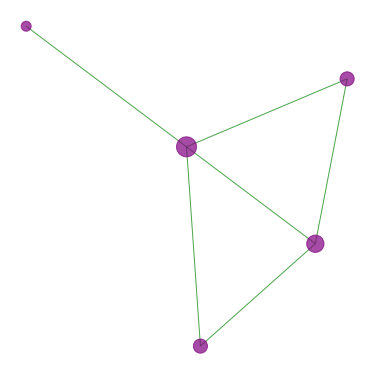

./graphs/barabasi-albert\steps\ba-steps-010.csv


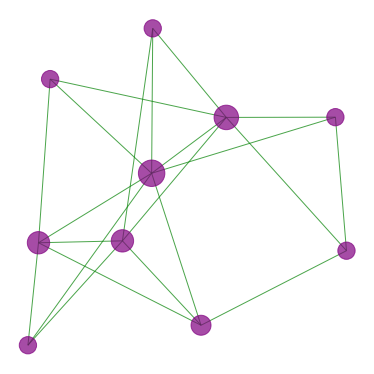

./graphs/barabasi-albert\steps\ba-steps-015.csv


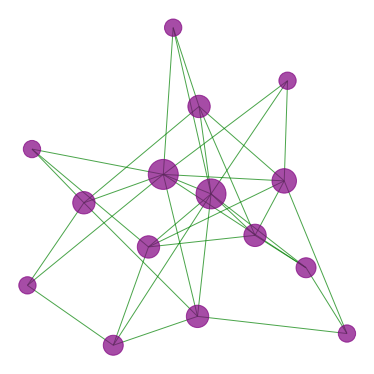

./graphs/barabasi-albert\steps\ba-steps-020.csv


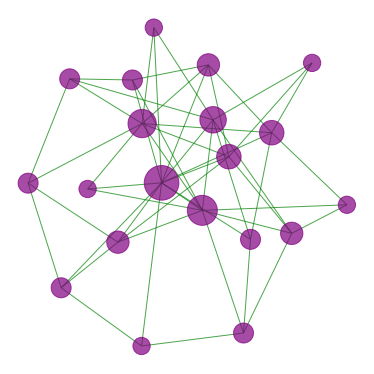

./graphs/barabasi-albert\steps\ba-steps-025.csv


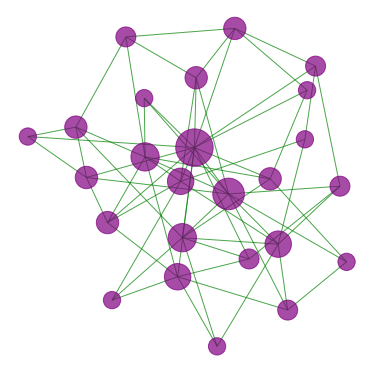

./graphs/barabasi-albert\steps\ba-steps-030.csv


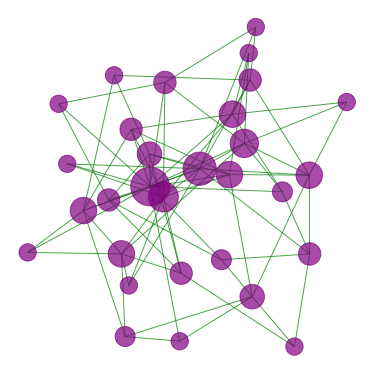

./graphs/barabasi-albert\steps\ba-steps-035.csv


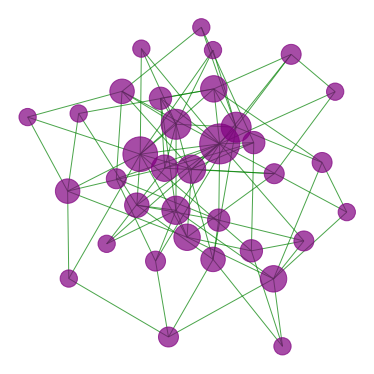

./graphs/barabasi-albert\steps\ba-steps-040.csv


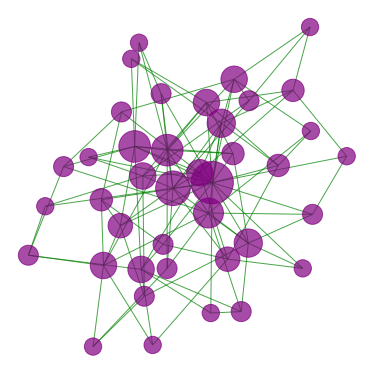

./graphs/barabasi-albert\steps\ba-steps-045.csv


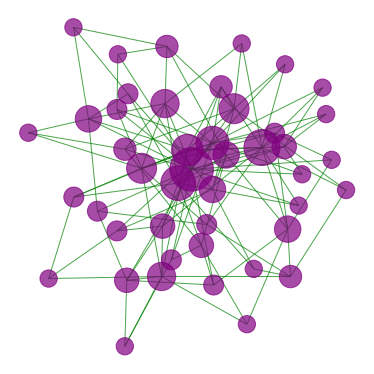

./graphs/barabasi-albert\steps\ba-steps-050.csv


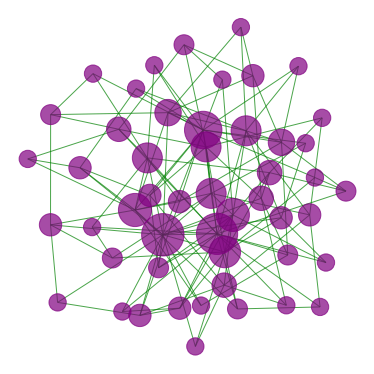

In [14]:
#barabasi albert steps
for i in range(8,18):
    print(files[i])
    draw_graph_node_size(g_list[i],5,5)

In [ ]:
#medidas a calcular para cada grafo
#grado medio, diametro, densidad, HITS, modularidad, clustering coefficient, eigenvector centrality

./graphs/erdos-renyi\regions\conectada.csv


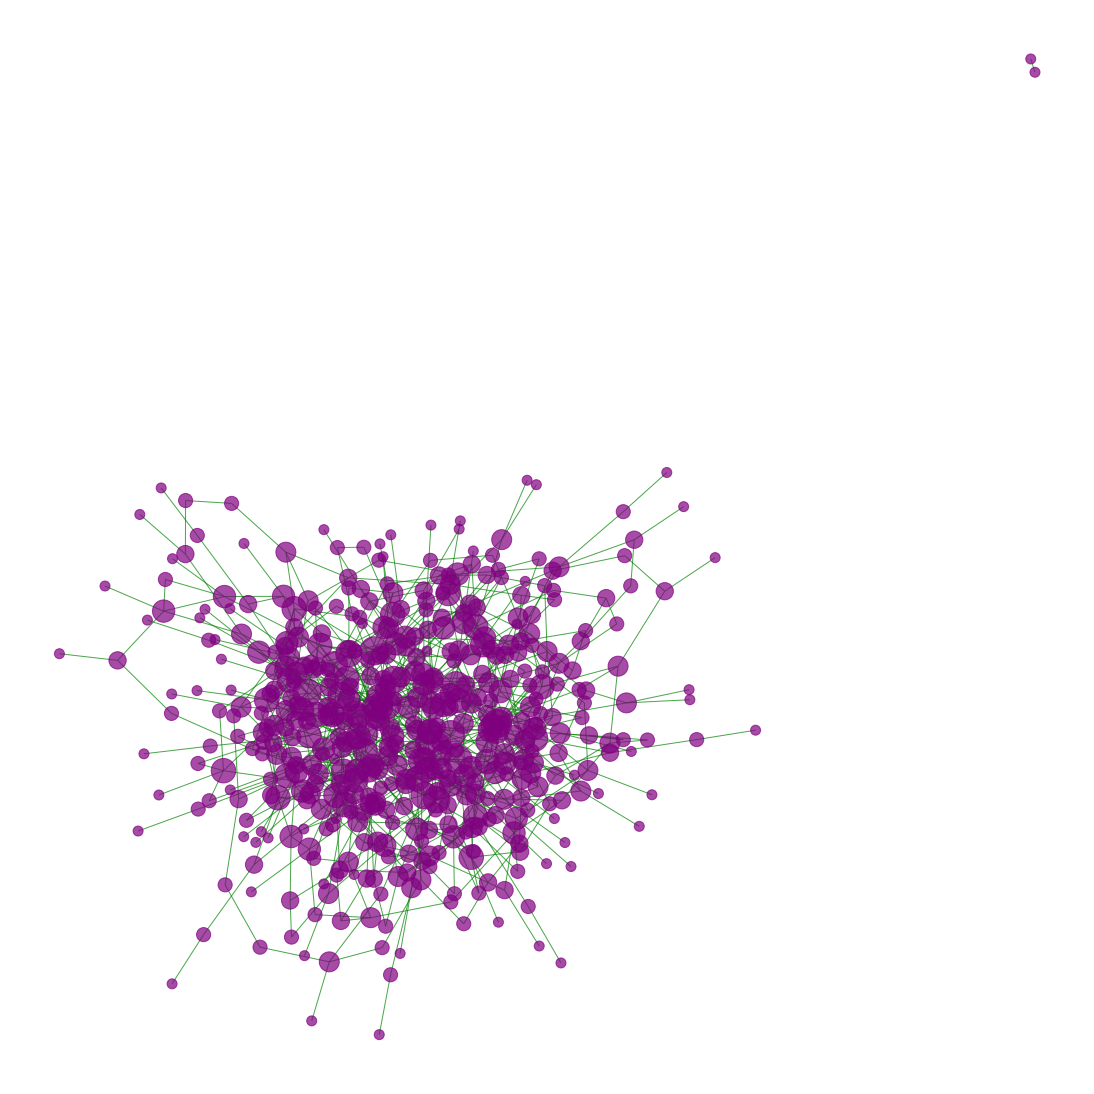

./graphs/erdos-renyi\regions\critica.csv


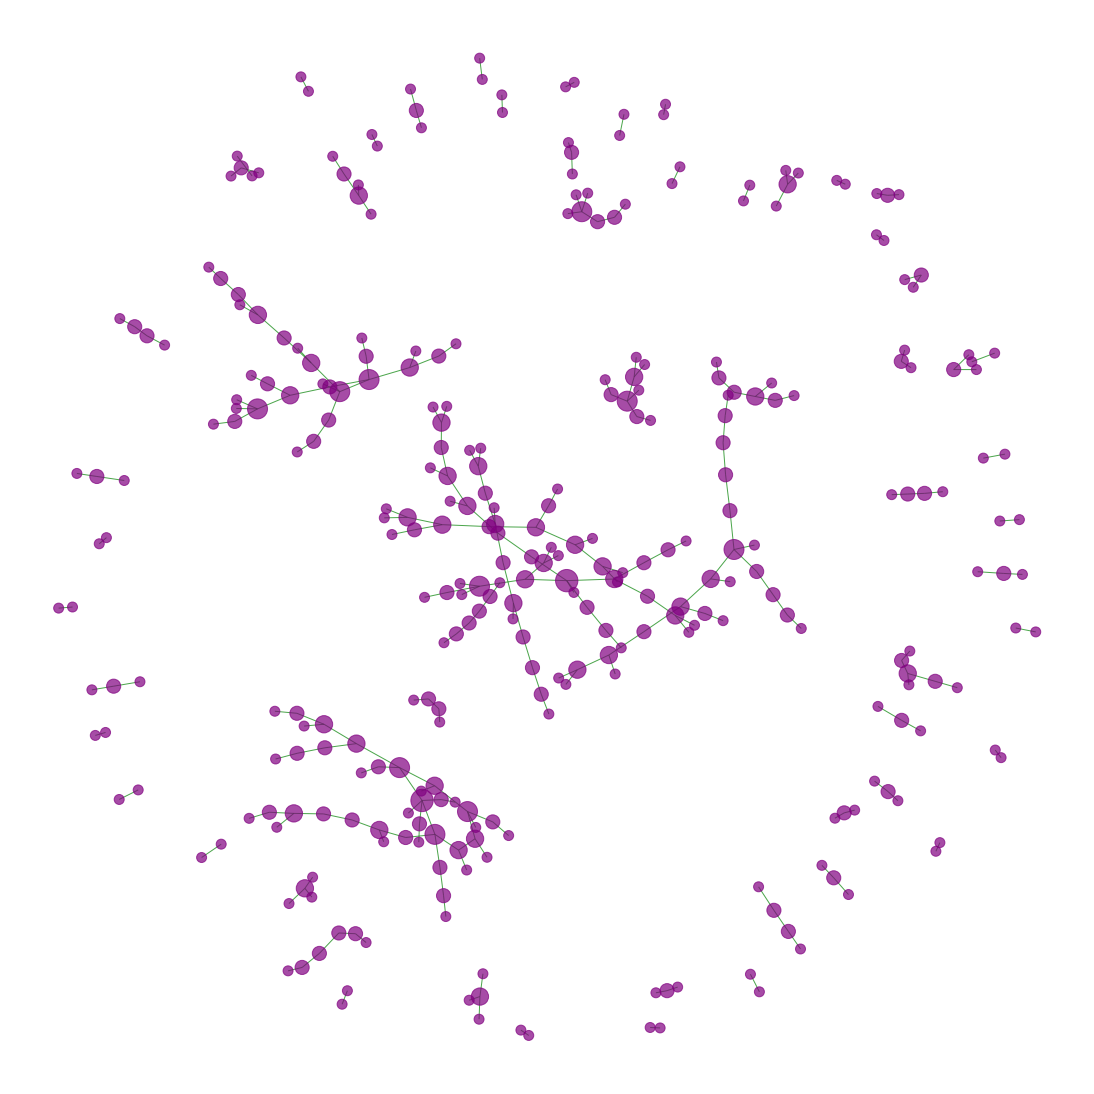

./graphs/erdos-renyi\regions\subcritica.csv


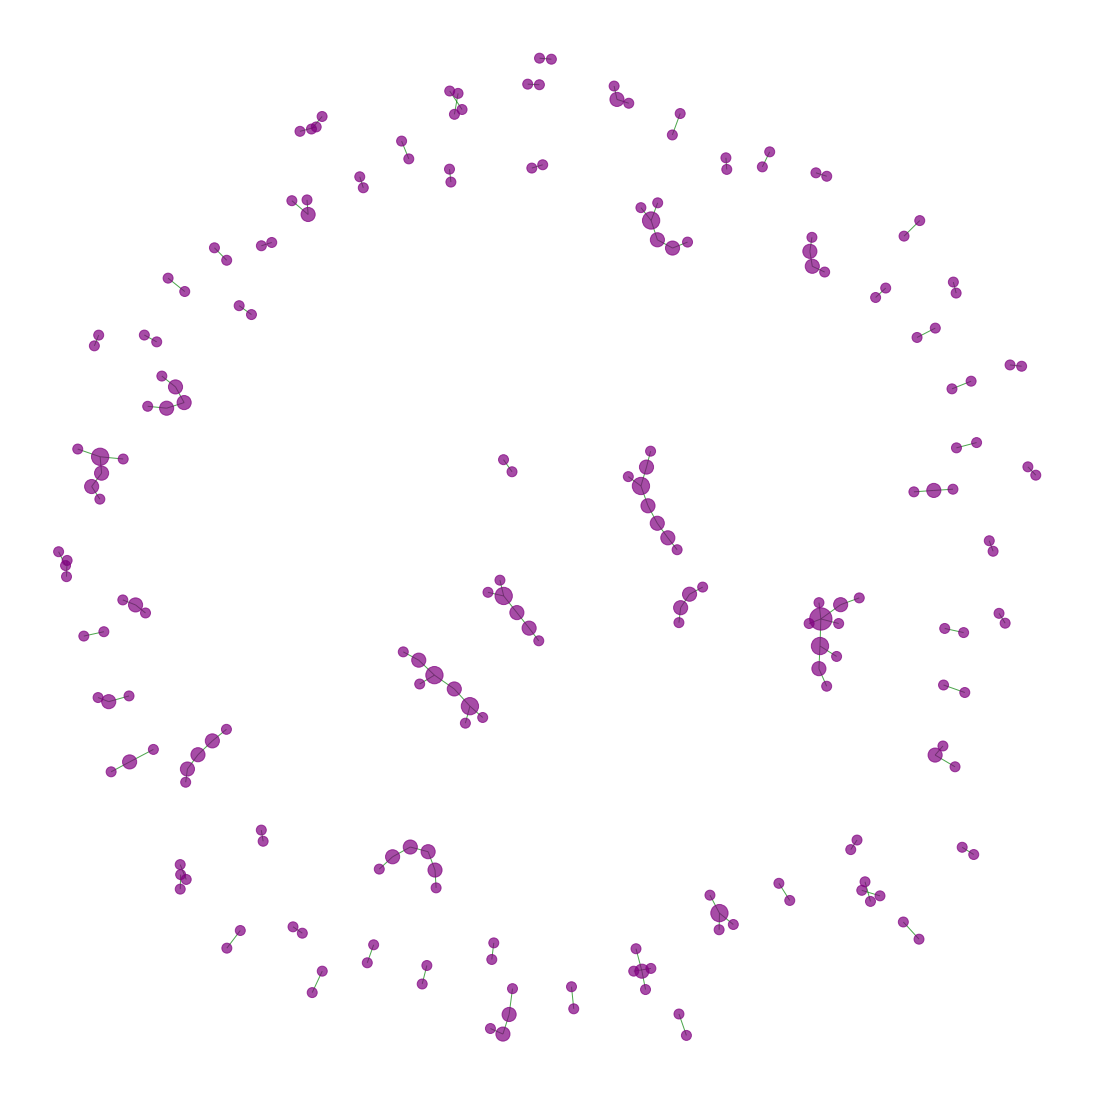

./graphs/erdos-renyi\regions\supercritica.csv


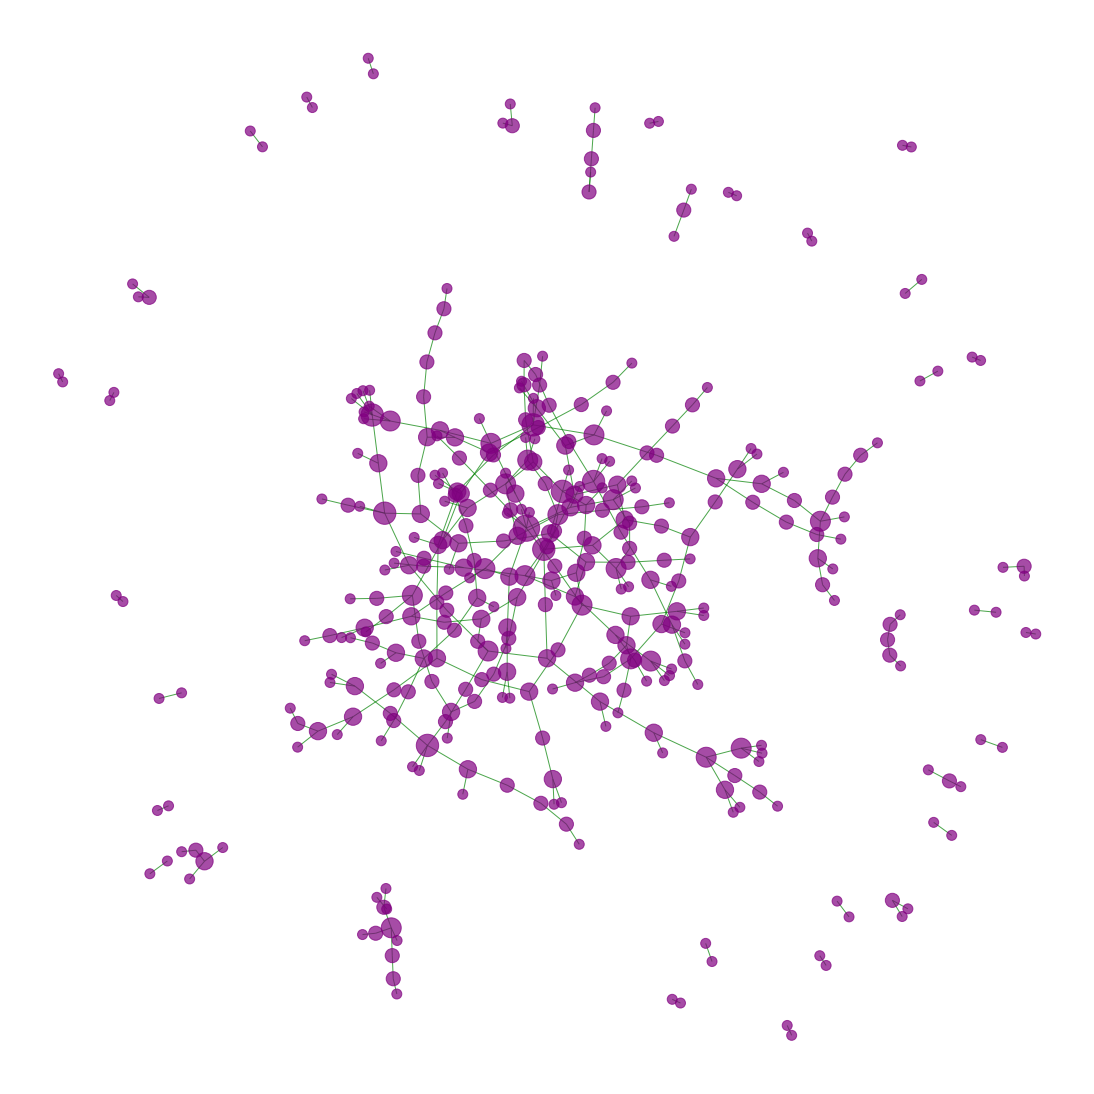

In [15]:
'''
erdos renyi graphs for every region with N=500
conectada p = 0.6
supercritica p = 0.3
critica p = 0.2
subcritica p = 0.1
'''
for i in range(57,61):
    print(files[i])
    draw_graph_node_size(g_list[i],15,15)